# 앙상블 모형 (Random Forest) : 연비 예측

- Voting 과 Bagging 분류모형 비교
  - Voting: 동일한 훈련 데이터, 다른 알고리즘
  - Bagging: 다른 훈련 데이터, 한가지 알고리즘

## 환경설정

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing # 전처리

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE

from sklearn.ensemble import RandomForestRegressor

## 데이터셋

In [2]:
# 2. 데이터셋
mpg_df = pd.read_csv('data/auto-mpg.csv', index_col='car name')
mpg_df = mpg_df[mpg_df.horsepower != '?']

# 3. 훈련/시험 데이터셋
y = mpg_df[['mpg']]
X = mpg_df.loc[:, 'cylinders':'origin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 777)
y_train = np.ravel(y_train,order='C') 

## 기계학습 - CV


In [3]:
reg_rf = RandomForestRegressor(n_estimators = 500, max_depth = 4, max_features = 3, bootstrap = True, random_state=777)

reg_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_features=3, n_estimators=500,
                      random_state=777)

## 예측 성능

In [4]:
y_pred = reg_rf.predict(X_test)

print('Random Forest Regression MSE: {:.3f}'.format(MSE(y_test, y_pred)))

Random Forest Regression MSE: 8.766


## 변수 중요도

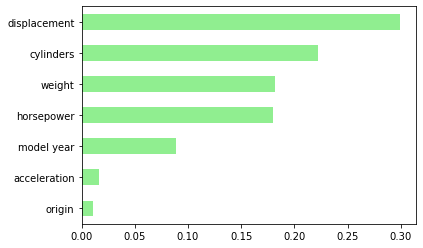

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

feat_imp = pd.Series(reg_rf.feature_importances_, index = X.columns)
feat_imp_sorted = feat_imp.sort_values()

feat_imp_sorted.plot(kind='barh', color='lightgreen')
plt.show()